In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('../input/loan-prediction-analysis/Loan Prediction Dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Married'] = data['Married'].fillna(data['Married'].mode())
data['Dependents'] =data['Dependents'].fillna(0)

In [6]:
data.shape

(614, 13)

In [7]:
#i cant replace gender by guessing so i will drop missing gender rows
data = data.dropna(axis=0)

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data.shape

(523, 13)

In [10]:
data = data.drop('Loan_ID',axis =1)

checking labels in each column and values

In [11]:
print('....gender....\n',data['Gender'].value_counts())
print('\n....Self_Employed....\n',data['Self_Employed'].value_counts())
print('\n....Credit history....\n',data['Credit_History'].value_counts())
print('\n....Loan_Status....\n',data['Loan_Status'].value_counts())

# so we only have 353 loan approvals and 170 non approval

....gender....
 Male      430
Female     93
Name: Gender, dtype: int64

....Self_Employed....
 No     451
Yes     72
Name: Self_Employed, dtype: int64

....Credit history....
 1.0    438
0.0     85
Name: Credit_History, dtype: int64

....Loan_Status....
 Y    353
N    170
Name: Loan_Status, dtype: int64


visualization

In [12]:
import warnings 
warnings.simplefilter("ignore")


In [13]:
data.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              306
               N              145
Yes            Y               47
               N               25
Name: Loan_Status, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

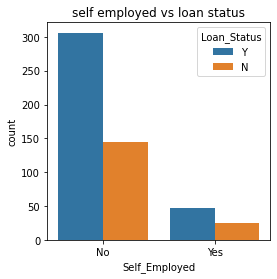

In [14]:
plt.figure(figsize =(4, 4))
sns.countplot(data['Self_Employed'],hue = data['Loan_Status'])
plt.title("self employed vs loan status")
plt.show

# people who are not self employed got high number of loan approvals 

Education     Loan_Status
Graduate      Y              286
              N              123
Not Graduate  Y               67
              N               47
Name: Loan_Status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

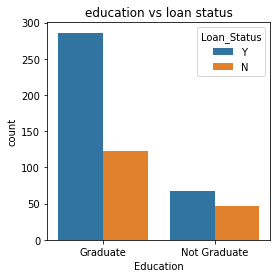

In [15]:
print(data.groupby('Education')['Loan_Status'].value_counts())

plt.figure(figsize =(4, 4))
sns.countplot(data['Education'],hue = data['Loan_Status'])
plt.title("education vs loan status")
plt.show

Dependents  Loan_Status
0           N                6
            Y                6
            Y              198
            N               96
1           Y               55
            N               30
2           Y               66
            N               22
3+          Y               28
            N               16
Name: Loan_Status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

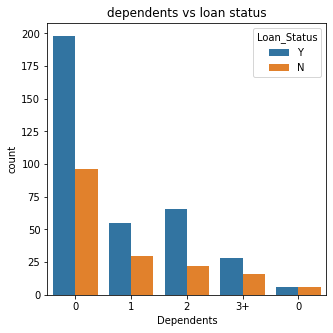

In [16]:
print(data.groupby('Dependents')['Loan_Status'].value_counts())

plt.figure(figsize =(5, 5))
sns.countplot(data['Dependents'],hue = data['Loan_Status'])
plt.title("dependents vs loan status")
plt.show

#almost same percentage for all labels, so it doesnt make much difference if customer has dependents or not


Credit_History  Loan_Status
0.0             N               78
                Y                7
1.0             Y              346
                N               92
Name: Loan_Status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

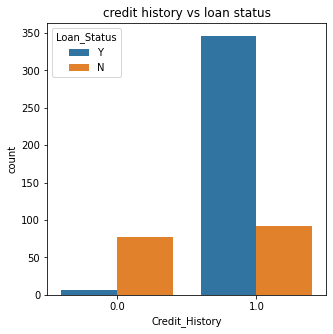

In [17]:
print(data.groupby('Credit_History')['Loan_Status'].value_counts())

# very low chances of getting loan if you dont have any credit history

plt.figure(figsize =(5, 5))
sns.countplot(data['Credit_History'],hue = data['Loan_Status'])
plt.title("credit history vs loan status")
plt.show

In [18]:
data = data.drop('Property_Area' ,axis =1)
data= data.drop('Gender',axis =1)
data= data.drop('Married',axis =1)

In [19]:
data.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Y
1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,N
2,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Y
3,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Y
4,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Y


In [20]:

data= data.astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 613
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dependents         523 non-null    object
 1   Education          523 non-null    object
 2   Self_Employed      523 non-null    object
 3   ApplicantIncome    523 non-null    object
 4   CoapplicantIncome  523 non-null    object
 5   LoanAmount         523 non-null    object
 6   Loan_Amount_Term   523 non-null    object
 7   Credit_History     523 non-null    object
 8   Loan_Status        523 non-null    object
dtypes: object(9)
memory usage: 57.0+ KB


In [21]:

cat_data = ['Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']

In [22]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in cat_data:
    data[col] = enc.fit_transform(data[col])


In [23]:
data.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,0,0,371,0,47,6,1,1
1,1,0,0,308,38,28,6,1,0
2,0,0,1,158,0,161,6,1,1
3,0,1,0,117,130,20,6,1,1
4,0,0,0,376,0,41,6,1,1


In [24]:
x= data.drop('Loan_Status',axis =1)
y= data['Loan_Status']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state =0)

In [26]:
from sklearn.model_selection import cross_val_score
 
def model_train(model,x,y):   
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state =0)
    model.fit(x_train,y_train)
    predict = model.predict(x_test)

    print("model score  ", model.score(x_test,y_test)*100)

    cross_val = cross_val_score(model,x,y,cv=5)
    print("cross val score  ", np.mean(cross_val)*100)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model_train(model,x,y)

model score   77.14285714285715
cross val score   80.8919413919414


In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_train(model,x,y)

model score   75.23809523809524
cross val score   79.73260073260073


In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model_train(model,x,y)

model score   70.47619047619048
cross val score   71.7032967032967


In [30]:
from xgboost import XGBClassifier

model = XGBClassifier()

model_train(model,x,y)

model score   74.28571428571429
cross val score   76.87362637362638


In [31]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()

model_train(cb,x,y)

Learning rate set to 0.007099
0:	learn: 0.6888229	total: 58.6ms	remaining: 58.6s
1:	learn: 0.6847992	total: 59.6ms	remaining: 29.7s
2:	learn: 0.6809664	total: 60.8ms	remaining: 20.2s
3:	learn: 0.6768948	total: 62.1ms	remaining: 15.5s
4:	learn: 0.6727210	total: 65.3ms	remaining: 13s
5:	learn: 0.6685478	total: 66.6ms	remaining: 11s
6:	learn: 0.6646863	total: 67.5ms	remaining: 9.57s
7:	learn: 0.6610583	total: 68.9ms	remaining: 8.54s
8:	learn: 0.6574006	total: 69.7ms	remaining: 7.67s
9:	learn: 0.6538226	total: 70.6ms	remaining: 6.99s
10:	learn: 0.6503406	total: 71.3ms	remaining: 6.41s
11:	learn: 0.6468916	total: 72.1ms	remaining: 5.93s
12:	learn: 0.6433583	total: 72.8ms	remaining: 5.53s
13:	learn: 0.6403208	total: 73.3ms	remaining: 5.16s
14:	learn: 0.6368485	total: 74.2ms	remaining: 4.87s
15:	learn: 0.6335418	total: 75.1ms	remaining: 4.62s
16:	learn: 0.6299476	total: 76ms	remaining: 4.4s
17:	learn: 0.6264734	total: 77ms	remaining: 4.2s
18:	learn: 0.6236498	total: 77.5ms	remaining: 4s
19:	l

hyperparameter tuning 

In [32]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


In [33]:
grid_search = { 'n_estimators' : n_estimators ,
              'max_features': max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split ,
              'min_samples_leaf' : min_samples_leaf }


In [34]:
random_forest = RandomForestClassifier()

random_forest = RandomizedSearchCV(estimator = random_forest, param_distributions = grid_search, scoring = 'accuracy', cv=5,n_iter =10, n_jobs =-1,random_state =42,verbose =2)
random_forest.fit(x,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [35]:
random_forest.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [36]:
random_forest.best_score_

0.8108241758241759

In [37]:
dt = DecisionTreeClassifier()


max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [38]:
grid_search = {
              'max_features': max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split ,
              'min_samples_leaf' : min_samples_leaf }


In [39]:
dt = RandomizedSearchCV(estimator = dt, param_distributions = grid_search, scoring = 'accuracy', cv=5,n_iter =10, n_jobs =-1,random_state =42,verbose =2)
dt.fit(x,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [40]:
dt.best_params_

{'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [41]:
dt.best_score_

0.7878571428571428

In [42]:
from scipy.stats import uniform, randint

xgb = XGBClassifier()



In [43]:
params = {     'Gamma' : uniform(0,0.5),
              'learning_rate': uniform(0.03,0.3),
              'max_depth' : randint(2,6),
              'n_estimators' : randint(100,150) ,
              'subsample' : uniform(0.6,0.4) }


In [44]:
xgboost = RandomizedSearchCV(estimator = xgb, param_distributions = params, scoring = 'accuracy', cv=5,n_iter =10, n_jobs =-1,random_state =42,verbose =2)
xgboost.fit(x,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe720965890>,
         

In [45]:
xgboost.best_params_

{'Gamma': 0.30582658024414044,
 'learning_rate': 0.03211989156591522,
 'max_depth': 2,
 'n_estimators': 148,
 'subsample': 0.8099098641033556}

In [46]:
xgboost.best_score_

0.806996336996337

confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix

[[16 21]
 [ 3 65]]


<AxesSubplot:>

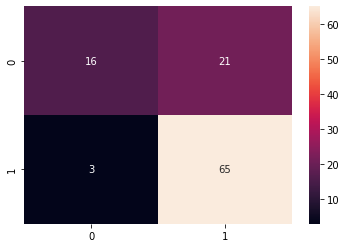

In [48]:
y_pred = xgboost.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

[[19 18]
 [ 3 65]]


<AxesSubplot:>

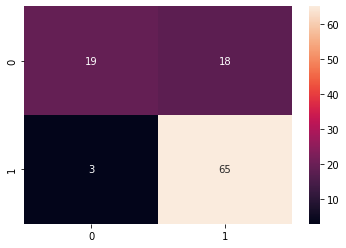

In [49]:
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)